In [1]:
##Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
 
#Importing Keras and Tensorflow for Deep Learning
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

#Importing other libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Importing libraries for model evaluation 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Reading the dataset
df = pd.read_csv('data.csv')
df.head()


Using TensorFlow backend.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
#Dropping unncessary columns
list = ['Unnamed: 32','id']
df.drop(list,axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Checking for missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
# Count the occurrences of malignant and non-malignant cells and print them
occ = df['diagnosis'].value_counts()
print(occ)

# Print the ratio of malignant and non-malignant cells
print(occ / len(df))

B    357
M    212
Name: diagnosis, dtype: int64
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


In [5]:
#Checking the variance 
print(df.var())

radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 324167.385102
smoothness_worst

In [6]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])

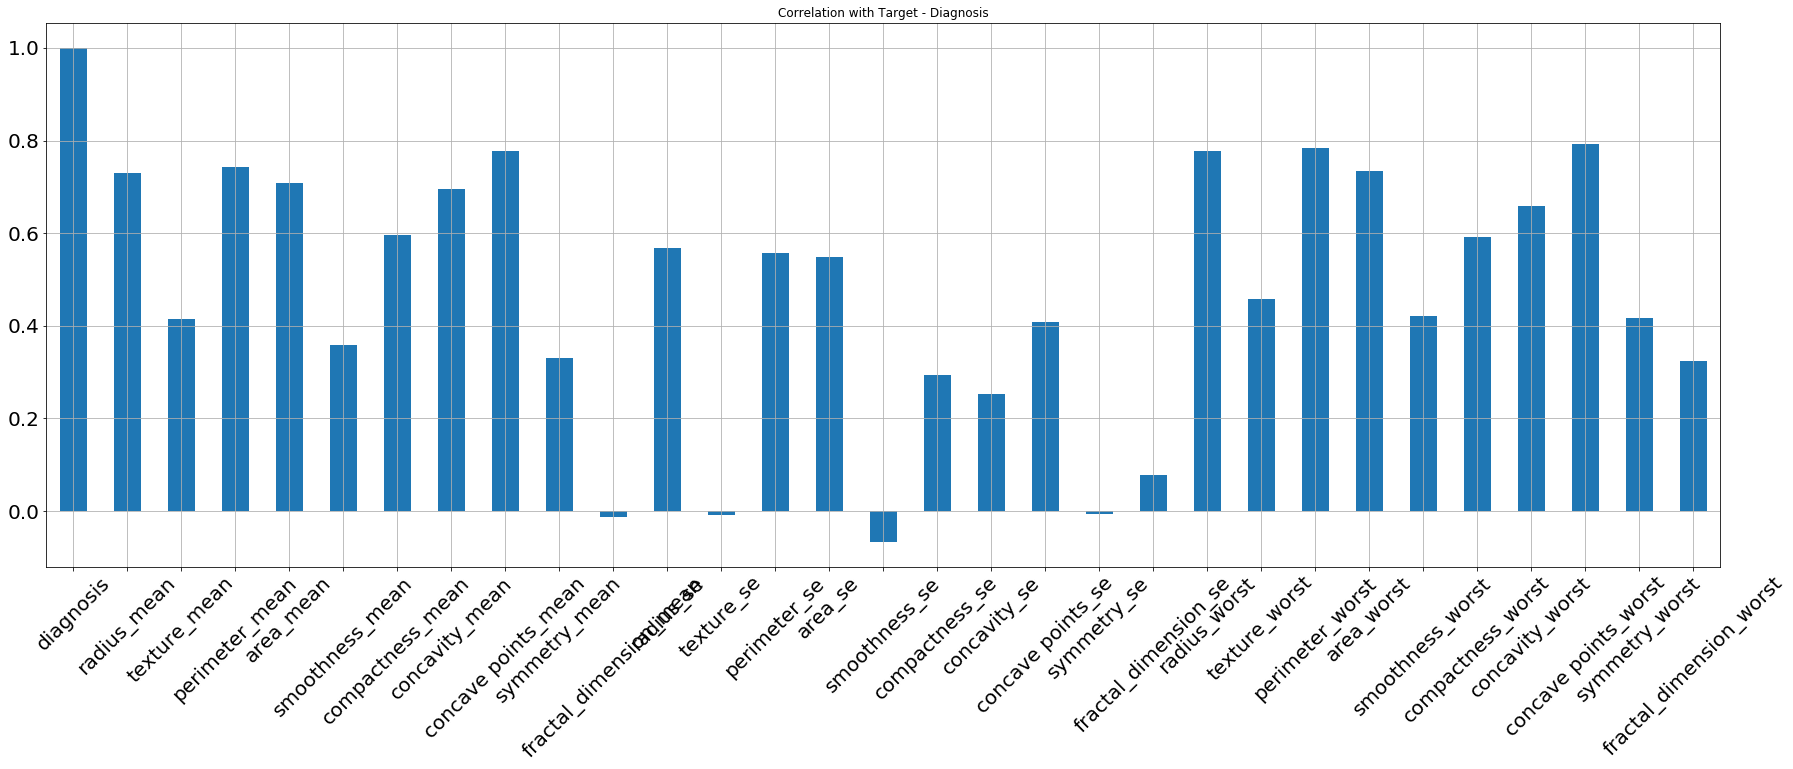

In [7]:
#Correlation checking in the dataset with the target value (Diagnosis)
df.corrwith(df.diagnosis).plot.bar(
        figsize = (30, 10), title = "Correlation with Target - Diagnosis", fontsize = 20,
        rot = 45, grid = True)

In [8]:
#Data selection - Here Only the important features are considered as they affect the models the most

df_1 = pd.DataFrame(df['diagnosis'])
df.drop(['diagnosis'], axis =1, inplace = True)
df_2 = pd.DataFrame(df[['radius_mean', 'texture_mean', 'perimeter_mean', 
                        'smoothness_mean', 'area_mean', 'concavity_mean', 'compactness_mean', 
                        'texture_se', 'area_se', 'fractal_dimension_mean']])


In [9]:

ss = StandardScaler()

X = df_2
Y = df_1.values

#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, 
                                                    stratify = Y)



#Scaling and transforming the training data
ss.fit(X_train[['radius_mean', 'texture_mean', 'perimeter_mean', 
                        'smoothness_mean', 'area_mean', 'concavity_mean', 'compactness_mean', 
                        'texture_se', 'area_se', 'fractal_dimension_mean']])

X_train = ss.transform(X_train[['radius_mean', 'texture_mean', 'perimeter_mean', 
                        'smoothness_mean', 'area_mean', 'concavity_mean', 'compactness_mean', 
                        'texture_se', 'area_se', 'fractal_dimension_mean']])


#Transforming the data
X_test = ss.transform(X_test[['radius_mean', 'texture_mean', 'perimeter_mean', 
                        'smoothness_mean', 'area_mean', 'concavity_mean', 'compactness_mean', 
                        'texture_se', 'area_se', 'fractal_dimension_mean']])




#Sampling the data


X_train_train, X_test_test, Y_train_train, Y_test_test = train_test_split(X_train, Y_train, test_size = 0.20)

sm = SMOTE(random_state=42, kind = 'borderline1')

X_resampled, Y_resampled = sm.fit_resample(X_train_train, Y_train_train)



#If needed can be performed

"""
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)

"""


'\nfrom sklearn.decomposition import PCA\npca = PCA()\nX_train = pca.fit_transform(X_train)\n\n'

In [10]:
print("Shape of X: {}".format(X.shape))
print("Shape of Y: {}".format(Y.shape))
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_test: {}".format(Y_test.shape))
print("Shape of X_resampled: {}".format(X_resampled.shape))
print("Shape of Y_resampled: {}".format(Y_resampled.shape))

Shape of X: (569, 10)
Shape of Y: (569, 1)
Shape of X_train: (398, 10)
Shape of X_test: (171, 10)
Shape of Y_train: (398, 1)
Shape of Y_test: (171, 1)
Shape of X_resampled: (396, 10)
Shape of Y_resampled: (396,)


In [11]:
from sklearn.metrics import f1_score
callbacks = [EarlyStopping(monitor='val_loss',mode='min',patience=2, restore_best_weights = True)]
results_control_accuracy = []
for i in range(0,30):
    model = Sequential()
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(keras.optimizers.Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

    history = model.fit(X_resampled, Y_resampled, callbacks = callbacks,
          epochs=30,validation_data = (X_test_test, Y_test_test),
          batch_size=256, verbose = 0)

    y_test_pred= model.predict(X_test) > 0.5
    
    f1 = f1_score(Y_test, y_test_pred)
    
    results_control_accuracy.append(f1)
    
print(results_control_accuracy)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[0.9242424242424244, 0.9037037037037037, 0.9047619047619047, 0.9022556390977444, 0.9291338582677166, 0.9302325581395349, 0.874074074074074, 0.9037037037037037, 0.9291338582677166, 0.9185185185185184, 0.8992248062015504, 0.923076923076923, 0.9185185185185184, 0.9242424242424244, 0.9090909090909091, 0.8955223880597014, 0.931297709923664, 0.9172932330827068, 0.9160305343511451, 0.9090909090909091, 0.9147286821705427, 0.8854961832061069, 0.8905109489051095, 0.921875, 0.9172932330827068, 0.923076923076923, 0.8992248062015504, 0.921875, 0.8992248062015504, 0.9384615384615383]


In [12]:
results_control_accuracy = pd.DataFrame(results_control_accuracy)
mean_control_accuracy = results_control_accuracy.mean()
print("Mean Control Accuracy: {}".format(mean_control_accuracy))

Mean Control Accuracy: 0    0.912497
dtype: float64


In [13]:
std_control_accuracy = results_control_accuracy.std()
print("Standard Deviation of Control Accuracy Results: {}".format(std_control_accuracy))

Standard Deviation of Control Accuracy Results: 0    0.015035
dtype: float64


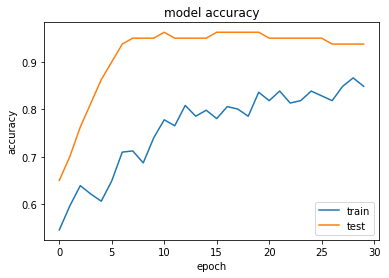

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

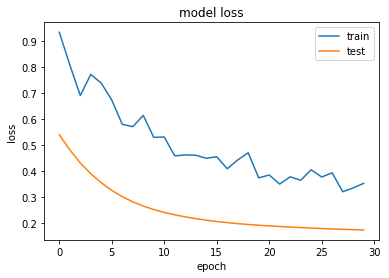

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [16]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_test_pred)
print(cm)

[[102   5]
 [  3  61]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       107
           1       0.92      0.95      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [18]:
print('Train Accuracy: {}\nTest Accuracy:{}'.format(history.history['acc'][-1], history.history['val_acc'][-1]))

Train Accuracy: 0.8484848520972512
Test Accuracy:0.9375


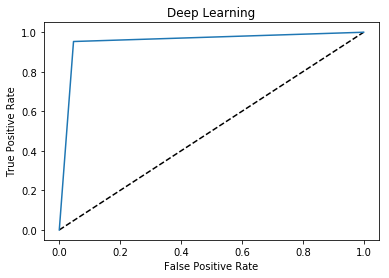

In [19]:
#Roc curve generation
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)
plt.plot ([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Learning')
plt.show()

In [20]:
from sklearn.metrics import f1_score
callbacks = [EarlyStopping(monitor='val_loss',mode='min',patience=2, restore_best_weights = True)]
results_experimental_accuracy = []
for i in range(0,30):
    model = Sequential()
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal',activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal',activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(keras.optimizers.Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

    history = model.fit(X_resampled, Y_resampled,callbacks = callbacks,
          epochs=30,validation_data = (X_test_test, Y_test_test),
          batch_size=256, verbose = 0)

    y_test_pred= model.predict(X_test) > 0.5
    
    f1 = f1_score(Y_test, y_test_pred)
    
    results_experimental_accuracy.append(f1)
    
print(results_experimental_accuracy)

[0.9037037037037037, 0.911764705882353, 0.9206349206349206, 0.893939393939394, 0.9090909090909091, 0.9147286821705427, 0.9206349206349206, 0.9172932330827068, 0.8840579710144927, 0.9375, 0.8244274809160305, 0.9090909090909091, 0.9104477611940298, 0.9147286821705427, 0.9160305343511451, 0.9206349206349206, 0.8905109489051095, 0.9206349206349206, 0.8970588235294118, 0.9384615384615383, 0.90625, 0.9180327868852458, 0.8905109489051095, 0.8992248062015504, 0.9375, 0.890625, 0.9393939393939394, 0.9022556390977444, 0.890625, 0.9264705882352942]


In [21]:
results_experimental_accuracy = pd.DataFrame(results_experimental_accuracy)
mean_experimental_accuracy = results_experimental_accuracy.mean()
print("Mean Experimental Accuracy: {}".format(mean_experimental_accuracy))

Mean Experimental Accuracy: 0    0.908542
dtype: float64


In [22]:
std_experimental_accuracy = results_experimental_accuracy.std()
print("Standard Deviation of Experimental Accuracy Results: {}".format(std_experimental_accuracy))

Standard Deviation of Experimental Accuracy Results: 0    0.022137
dtype: float64


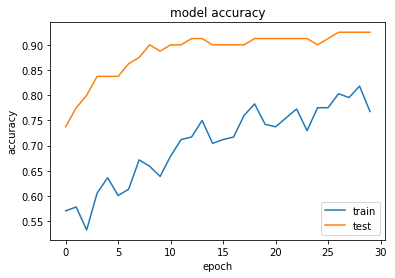

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

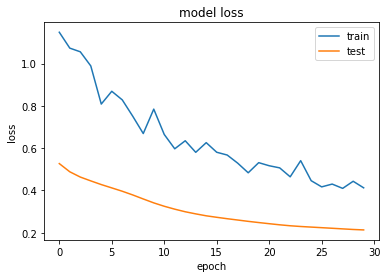

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [25]:
#Confusion Matrix generation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_test_pred)
print(cm)

[[98  9]
 [ 1 63]]


In [26]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       107
           1       0.88      0.98      0.93        64

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171



In [27]:
print('Train Accuracy: {}\nTest Accuracy:{}'.format(history.history['acc'][-1], history.history['val_acc'][-1]))

Train Accuracy: 0.7676767736974389
Test Accuracy:0.925000011920929


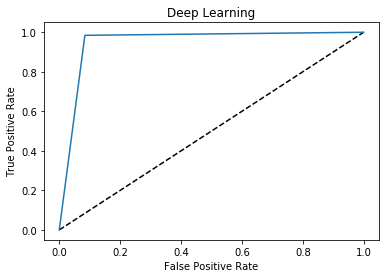

In [28]:
#Roc Curve generation
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)
plt.plot ([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Learning')
plt.show()

In [29]:
results_accuracy= pd.concat([results_control_accuracy, results_experimental_accuracy], axis=1)
results_accuracy.columns = ['Control', 'Experimental']

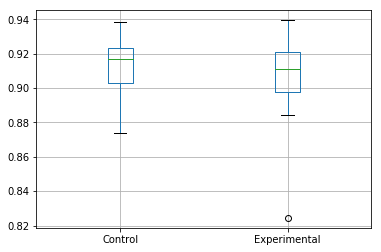

In [30]:
results_accuracy.boxplot()

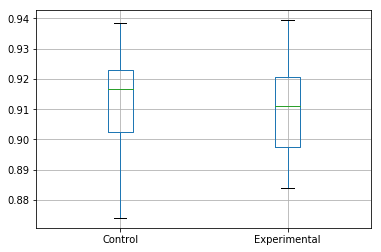

In [31]:
results_accuracy.boxplot(showfliers=False)

(0.9, 1)

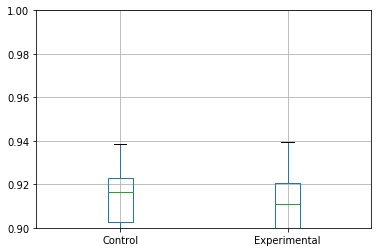

In [32]:
ax = results_accuracy.boxplot()
ax.set_ylim([0.9,1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffdf304c630>,
      dtype=object)

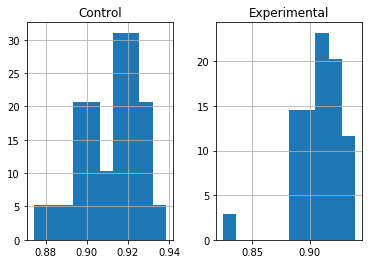

In [33]:
results_accuracy.hist(density=True)

In [34]:
#Normality Testing
from scipy import stats

alpha = 0.05;

s, p = stats.normaltest(results_control_accuracy)
if p < alpha:
  print('Control data is not normal')
else:
  print('Control data is normal')

s, p = stats.normaltest(results_experimental_accuracy)
if p < alpha:
  print('Experimental data is not normal')
else:
  print('Experimental data is normal')

Control data is normal
Experimental data is not normal


In [35]:
#Significance Testing
s, p = stats.wilcoxon(results_control_accuracy[0], results_experimental_accuracy[0])

if p < 0.05:
  print('null hypothesis rejected, significant difference between the data-sets')
else:
  print('null hypothesis accepted, no significant difference between the data-sets')

null hypothesis accepted, no significant difference between the data-sets
